# Exploratory Data Analysis US Traffic Accidents

## About Dataset

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately 7.7 million accident records. For more information about this dataset, please visit [here](https://smoosavi.org/datasets/us_accidents).

In [ ]:
# pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sebastangarrido


Your Kaggle Key:

  ········


100%|███████████████████████████████████████████████████████████████████████████████| 653M/653M [00:30<00:00, 22.6MB/s]


## Data Preparation and Cleaning

In [ ]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import jupyter_black

jupyter_black.load()
%matplotlib inline
sns.set_style("darkgrid")

# Set default size parameters
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams.update(
    {
        "font.size": 15,
        "axes.titlesize": 18,
        "axes.labelsize": 15,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12,
        "figure.titlesize": 20,
    }
)

import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [ ]:
# Define the file path and the chunk size
file_path = "./us-accidents/US_Accidents_March23.csv"
chunk_size = 100000  # Adjust the chunk size based on your memory capacity

# Initialize an empty list to store sampled chunks
sampled_chunks = []

# Define the sample fraction and seed for reproducibility
sample_fraction = 0.3
random.seed(1)

# Read the dataset in chunks and sample directly from chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Generate a random seed for this chunk between 0 and 10000
    chunk_random_seed = random.randint(0, 10000)
    # Sample 30% of the rows from this chunk using the generated seed
    sampled_chunk = chunk.sample(frac=sample_fraction, random_state=chunk_random_seed)
    # Append the sampled chunk to the list
    sampled_chunks.append(sampled_chunk)

# Concatenate sampled chunks into a single DataFrame
df_sample = pd.concat(sampled_chunks, ignore_index=True)

In [ ]:
df_sample

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-84486,Source2,2,2016-10-17 09:21:17,2016-10-17 09:58:00,33.853855,-117.955376,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-59894,Source2,2,2016-12-30 21:18:01,2016-12-30 22:02:24,34.077187,-118.281334,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-98035,Source2,2,2016-03-27 14:24:58,2016-03-27 15:24:58,34.160980,-118.469437,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-25419,Source2,2,2016-10-19 20:13:11,2016-10-19 20:42:51,37.553181,-122.294724,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
4,A-79958,Source2,2,2016-09-27 14:00:02,2016-09-27 14:29:37,33.849445,-117.834862,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318513,A-7769019,Source1,3,2019-08-05 11:13:40,2019-08-05 11:42:06,32.741730,-96.919300,32.731096,-96.919930,0.736,...,False,False,False,False,False,False,Day,Day,Day,Day
2318514,A-7768168,Source1,2,2019-08-02 09:24:56,2019-08-02 09:53:45,38.137320,-121.257820,38.134370,-121.257620,0.204,...,False,False,False,False,False,False,Day,Day,Day,Day
2318515,A-7776144,Source1,2,2019-08-20 16:00:48,2019-08-20 17:19:58,43.777645,-117.813621,43.771934,-117.787392,1.367,...,False,False,False,False,False,False,Day,Day,Day,Day
2318516,A-7777376,Source1,2,2019-08-23 16:26:02,2019-08-23 16:53:31,40.778860,-74.056800,40.783280,-74.053380,0.354,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# Remove duplicates
num_duplicates = df_sample.duplicated().sum()
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicated rows in 'sampled_data'.")
    df_sample = df_sample.drop_duplicates()
else:
    print("There are no duplicated rows in 'sampled_data'.")

There are no duplicated rows in 'sampled_data'.


**Percentage of missing values per column**

In [ ]:
missing_percentages = (
    df_sample.isna().sum().sort_values(ascending=False) / len(df_sample)
) * 100

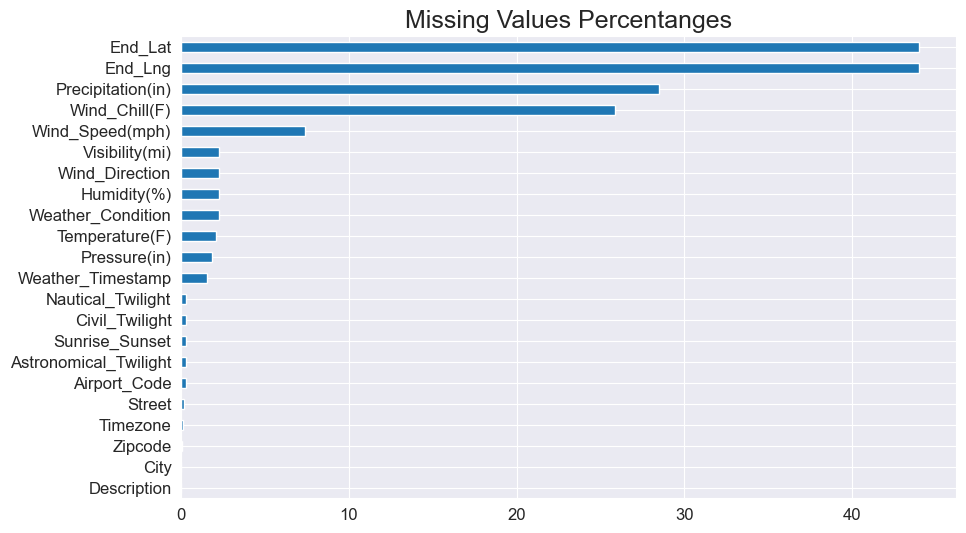

In [ ]:
missing_percentages = (
    df_sample.isna().sum().sort_values(ascending=False) / len(df_sample)
) * 100
missing_percentages[missing_percentages != 0].sort_values().plot(kind="barh")
plt.title("Missing Values Percentanges")
plt.show()

### Removeving Useless olumns

In [ ]:
df_sample.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# List of relevant columns usefull for EDA
new_columns = [
    "ID",
    "City",
    "State",
    "Severity",
    "Start_Time",
    "Start_Lat",
    "Start_Lng",
    "Distance(mi)",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Weather_Condition",
]

In [ ]:
# Create a new DataFrame with only the relevant columns and make an explicit copy
df = df_sample[new_columns].copy()

In [ ]:
df

,ID,City,State,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
0,A-84486,Anaheim,CA,2,2016-10-17 09:21:17,33.853855,-117.955376,0.010,66.0,93.0,29.97,4.0,4.6,0.01,Light Rain
1,A-59894,Los Angeles,CA,2,2016-12-30 21:18:01,34.077187,-118.281334,0.010,57.9,93.0,29.96,7.0,NaN,NaN,Overcast
2,A-98035,Sherman Oaks,CA,2,2016-03-27 14:24:58,34.160980,-118.469437,0.010,73.9,45.0,29.95,10.0,9.2,NaN,Clear
3,A-25419,San Mateo,CA,2,2016-10-19 20:13:11,37.553181,-122.294724,0.010,66.2,37.0,30.13,10.0,73.6,NaN,Mostly Cloudy
4,A-79958,Anaheim,CA,2,2016-09-27 14:00:02,33.849445,-117.834862,0.000,93.0,20.0,29.81,10.0,9.2,NaN,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2318513,A-7769019,Dallas,TX,3,2019-08-05 11:13:40,32.741730,-96.919300,0.736,86.0,61.0,29.25,10.0,3.0,0.00,Partly Cloudy
2318514,A-7768168,Lodi,CA,2,2019-08-02 09:24:56,38.137320,-121.257820,0.204,72.0,59.0,29.99,10.0,6.0,0.00,Fair
2318515,A-7776144,Juntura,OR,2,2019-08-20 16:00:48,43.777645,-117.813621,1.367,92.0,13.0,25.75,10.0,0.0,0.00,Fair
2318516,A-7777376,Secaucus,NJ,2,2019-08-23 16:26:02,40.778860,-74.056800,0.354,75.0,53.0,29.97,10.0,3.0,0.00,Fair


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318518 entries, 0 to 2318517
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   City               object 
 2   State              object 
 3   Severity           int64  
 4   Start_Time         object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   Distance(mi)       float64
 8   Temperature(F)     float64
 9   Humidity(%)        float64
 10  Pressure(in)       float64
 11  Visibility(mi)     float64
 12  Wind_Speed(mph)    float64
 13  Precipitation(in)  float64
 14  Weather_Condition  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 265.3+ MB


In [ ]:
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Severity,2318518.0,2.212,0.488,1.000,2.000,2.000,2.000,4.000
Start_Lat,2318518.0,36.202,5.077,24.560,33.398,35.825,40.085,49.000
Start_Lng,2318518.0,-94.705,17.389,-124.548,-117.218,-87.763,-80.357,-67.553
Distance(mi),2318518.0,0.560,1.762,0.000,0.000,0.029,0.464,254.400
Temperature(F),2269759.0,61.670,19.002,-89.000,49.000,64.000,76.000,196.000
Humidity(%),2266647.0,64.813,22.824,1.000,48.000,67.000,84.000,100.000
Pressure(in),2276643.0,29.539,1.007,0.000,29.370,29.860,30.030,58.630
Visibility(mi),2265767.0,9.092,2.687,0.000,10.000,10.000,10.000,140.000
Wind_Speed(mph),2147415.0,7.682,5.379,0.000,4.600,7.000,10.400,822.800
Precipitation(in),1657323.0,0.008,0.103,0.000,0.000,0.000,0.000,24.000


### Statistical Summary

This summary provides key insights into the distribution of various features related to US traffic accidents.

#### 1. Severity
- The majority of accidents have a severity rating of **2** (median and 75th percentile = 2).
- The severity ranges from **1 to 4**, with an average of **2.21** and a relatively low standard deviation (**0.488**), indicating that most accidents are of low to moderate severity.

#### 2. Location (Latitude & Longitude)
- The latitude ranges from **24.56° (Southern US) to 49.00° (Northern US)**, covering most of the continental US.
- The longitude spans from **-124.55° (West Coast) to -67.55° (East Coast)**, indicating a wide geographical distribution.

#### 3. Distance Impacted
- The median distance affected by accidents is **0.029 miles**, and 75% of accidents impact less than **0.464 miles**.
- The maximum value (**254.4 miles**) is an extreme outlier, likely representing a rare event.

#### 4. Weather Conditions
- **Temperature**: The average temperature is **61.67°F**, with a wide range from **-89°F to 196°F**, suggesting some outliers.
- **Humidity**: The median is **67%**, with a broad distribution (min: **1%**, max: **100%**), suggesting varied environmental conditions.
- **Pressure**: The median pressure is **29.86 inHg**, which aligns with normal atmospheric pressure. The minimum value of **0 inHg** and the maximum of **58.63 inHg** indicate possible data errors.
- **Visibility**: Most accidents occur in good visibility (**median = 10 miles**), but extreme values (**max = 140 miles**) suggest potential errors or unusual cases.
- **Wind Speed**: The median wind speed is **7 mph**, but the maximum of **822.8 mph** is highly unrealistic and likely an error.
- **Precipitation**: Most accidents occur in dry conditions (**median = 0.00 in**), with a few extreme cases reaching **24 in**.

#### Key Takeaways
- **Most accidents are of low severity (Severity 2).**
- **Accidents tend to impact short distances.**
- **Most accidents happen in clear weather with good visibility.**
- **Some extreme weather values suggest data errors that need cleaning.**
- **There are outliers in temperature, pressure, wind speed, and precipitation, which should be investigated further.**


## EDA

### Feature Relationships

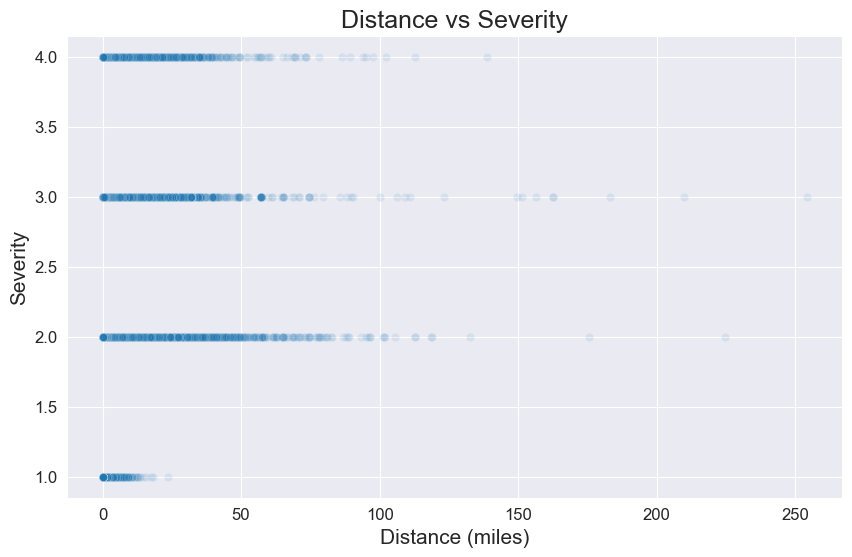

In [ ]:
sns.scatterplot(x="Distance(mi)", y="Severity", data=df, alpha=0.1)
plt.title("Distance vs Severity")
plt.xlabel("Distance (miles)")
plt.ylabel("Severity")
plt.show()

**Interpretation of Distance vs. Severity Scatter Plot**

**Key Observations:**
1. **Severity Levels Are Distinctly Separated:**  
   - The dataset contains four distinct severity levels (**1, 2, 3, and 4**), which are plotted as horizontal clusters.
   - The most frequent severity level appears to be **2**, consistent with the statistical summary.

2. **Shorter Distances Are More Common:**  
   - Most accidents occur over very short distances (close to **0 miles**), reinforcing the earlier statistical insight that **50% of accidents affect less than 0.03 miles**.
   - Higher severity levels (**3 and 4**) also tend to have short distances, but a few extend further.

3. **Longer Distance Accidents Are Rare:**  
   - A few accidents cover long distances (**above 50 miles**), but they appear as outliers.
   - These outliers could be **multi-vehicle accidents, road closures, or errors in data recording**.

4. **Severity 1 Accidents Are the Shortest:**  
   - Almost all **severity 1 accidents** are concentrated around **0 miles**, indicating they may involve minor incidents such as roadside stops or brief disruptions.

5. **No Strong Correlation Between Distance and Severity:**  
   - While higher severity accidents can have longer distances, the majority still remain within short distances.
   - The distribution suggests that **other factors (weather, traffic, road conditions) might influence severity more than distance alone**.

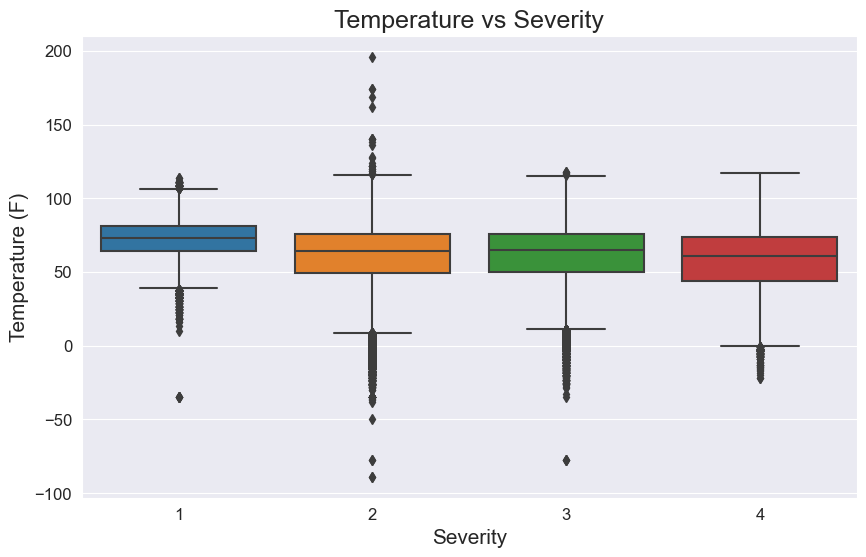

In [ ]:
sns.boxplot(x="Severity", y="Temperature(F)", data=df)
plt.title("Temperature vs Severity")
plt.xlabel("Severity")
plt.ylabel("Temperature (F)")
plt.show()

**Interpretation of Temperature vs. Severity Box Plot**

**Key Observations:**
1. **Temperature Distribution Across Severity Levels:**
   - The temperature range is quite **similar** across all severity levels.
   - Most accidents occur between **30°F and 90°F**, regardless of severity.
   - The median temperature remains relatively stable across all severities.

2. **Presence of Outliers:**
   - There are extreme temperature outliers, such as **below -50°F and above 150°F**.
   - These could indicate **data entry errors or unusual weather conditions (e.g., heatwaves, extreme winter storms).**
   - Checking these extreme values might help ensure data quality.

3. **Lower Temperatures Show More Variation:**
   - Severity **2, 3, and 4** have accidents occurring at **very low temperatures (sub-zero)**.
   - These could be related to hazardous conditions like **snow, ice, or fog** increasing accident risk.
   - Severity **1** has fewer extremely low-temperature accidents.

4. **Higher Temperatures (Above 100°F) Are Less Frequent:**
   - Some accidents occur in **very high temperatures**, but they appear as outliers.
   - High temperatures might be linked to **tire blowouts, driver fatigue, or overheating vehicles.**

5. **No Strong Correlation Between Temperature and Severity:**
   - Since the medians are close across all severity levels, **temperature alone may not be a strong predictor of accident severity.**
   - However, extreme temperatures (both high and low) could contribute to dangerous driving conditions.

In [ ]:
# Filter out unrealistic temperatures
valid_temp_range = (df["Temperature(F)"] >= -50) & (df["Temperature(F)"] <= 150)
df = df[valid_temp_range].copy()

In [ ]:
df[(df["Temperature(F)"] <= -50) & (df["Temperature(F)"] >= 150)].sum().max()

0

### What is the Frequency of each Severity Level?

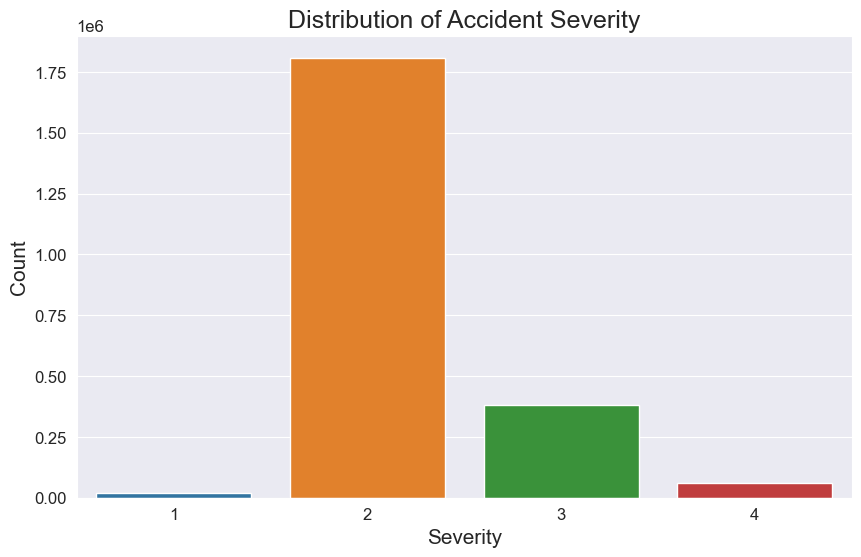

In [ ]:
sns.countplot(x="Severity", data=df)
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

### Areas with high Accident Concentrations

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

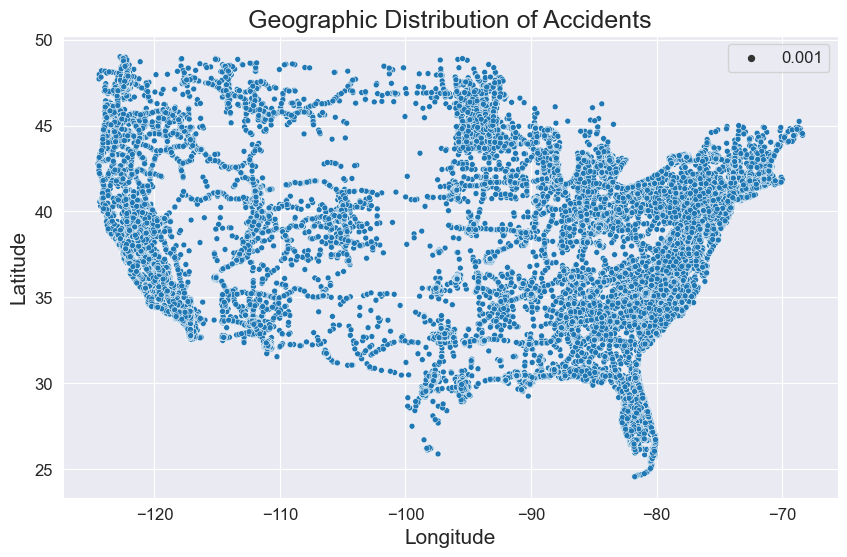

In [ ]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)
plt.title("Geographic Distribution of Accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

This scatter plot visualizes the geographic distribution of traffic accidents across the United States. The data suggests that accidents are concentrated in urban and densely populated areas, particularly in the Eastern U.S., the West Coast (California), and around major highways.  

- **High-Density Areas**: The East Coast, especially around New York, Washington D.C., and Florida, shows a dense clustering of accidents. This aligns with high traffic volumes and urban congestion.  
- **West Coast Clusters**: California, particularly around Los Angeles and the San Francisco Bay Area, has a significant number of accidents, likely due to heavy traffic and a high population density.  
- **Sparse Regions**: The Midwest and central U.S. (e.g., Montana, North Dakota, Wyoming) have relatively fewer recorded accidents, reflecting lower population density and reduced traffic volume.  
- **Highway Influence**: Major interstates such as I-95 (East Coast) and I-10 (Southern U.S.) appear to contribute to accident occurrences, indicating that high-speed roadways may be common sites for traffic incidents.  

Overall, the data confirms that traffic accidents are predominantly an urban issue, with major metropolitan areas and high-traffic corridors being hotspots. Further analysis could investigate factors such as weather conditions, road infrastructure, and time of day to refine insights into accident risks.

### Cities with More Accidents

In [ ]:
df.City.value_counts()

City
Miami          55125
Houston        50104
Los Angeles    46761
Charlotte      41765
Dallas         39257
               ...  
Pedro              1
Maurepas           1
Gerry              1
Farmdale           1
Montour            1
Name: count, Length: 11840, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2269747 entries, 0 to 2318517
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   City               object 
 2   State              object 
 3   Severity           int64  
 4   Start_Time         object 
 5   Start_Lat          float64
 6   Start_Lng          float64
 7   Distance(mi)       float64
 8   Temperature(F)     float64
 9   Humidity(%)        float64
 10  Pressure(in)       float64
 11  Visibility(mi)     float64
 12  Wind_Speed(mph)    float64
 13  Precipitation(in)  float64
 14  Weather_Condition  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 277.1+ MB


In [ ]:
# Identify the top 10 cities by accident count
top_10_cities = df["City"].value_counts().head(10).index.tolist()

# Filter DataFrame to keep only rows where "City" is in the top 10 list
df_top_10 = df[df["City"].isin(top_10_cities)]

In [ ]:
agg_data_top_10 = df_top_10.groupby("City").agg(
    {
        "Temperature(F)": ["mean", "max", "count", "sum"],
        "Humidity(%)": ["mean", "max", "count", "sum"],
    }
)

In [ ]:
# Flatten the MultiIndex columns
agg_data_top_10.columns = ["_".join(col) for col in agg_data_top_10.columns]
agg_data_top_10.reset_index(inplace=True)

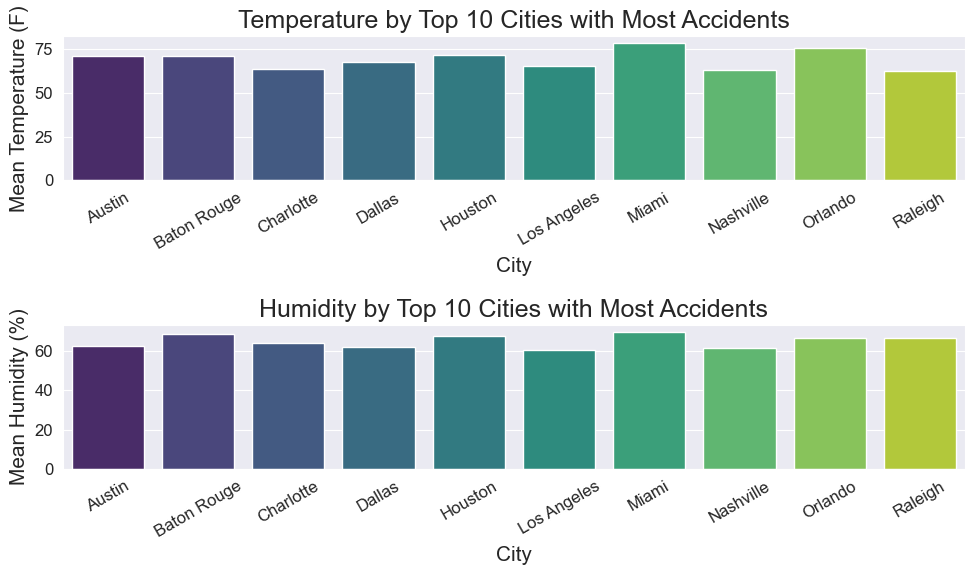

In [ ]:
# Plot mean temperature by city
plt.subplot(2, 1, 1)
sns.barplot(x="City", y="Temperature(F)_mean", data=agg_data_top_10, palette="viridis")
plt.title("Temperature by Top 10 Cities with Most Accidents")
plt.xlabel("City")
plt.ylabel("Mean Temperature (F)")
plt.xticks(rotation=30)

# Plot mean humidity by city
plt.subplot(2, 1, 2)
sns.barplot(x="City", y="Humidity(%)_mean", data=agg_data_top_10, palette="viridis")
plt.title("Humidity by Top 10 Cities with Most Accidents")
plt.xlabel("City")
plt.ylabel("Mean Humidity (%)")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

These bar charts illustrate the mean temperature and humidity levels in the 10 U.S. cities with the highest number of traffic accidents.  

- **Temperature Trends**:  
  - Most cities with frequent accidents have moderate to warm temperatures, with Miami and Orlando being the warmest.  
  - The temperature distribution suggests that extreme cold conditions might not be a major contributor to high accident frequencies.  
  - Cities like Nashville and Charlotte have slightly lower mean temperatures but still experience a high volume of accidents, indicating that factors beyond temperature influence accident rates.  

- **Humidity Trends**:  
  - High-humidity cities, such as Miami, Baton Rouge, and Orlando, also report high accident numbers.  
  - Cities with relatively lower humidity, such as Los Angeles and Dallas, also rank among the top, suggesting that while humidity may play a role, it is not a dominant factor.  
  - The prevalence of Southern and coastal cities in this dataset suggests that weather conditions (e.g., rain, fog, or storms) could contribute to accidents.  

**Key Insights**:  
- The presence of warm and humid cities like Miami, Houston, and Orlando among the most accident-prone locations suggests that high humidity, possibly leading to wet road conditions, could be a contributing factor.  
- Since no extreme cold-weather cities appear in this list, ice-related accidents may not be a primary concern in this dataset.  
- Further analysis is needed to examine the interaction between weather conditions (e.g., precipitation) and accident frequency to determine their true impact.

In [ ]:
len(df.City.unique())

11841

In [ ]:
cities_by_accident = df.City.value_counts()

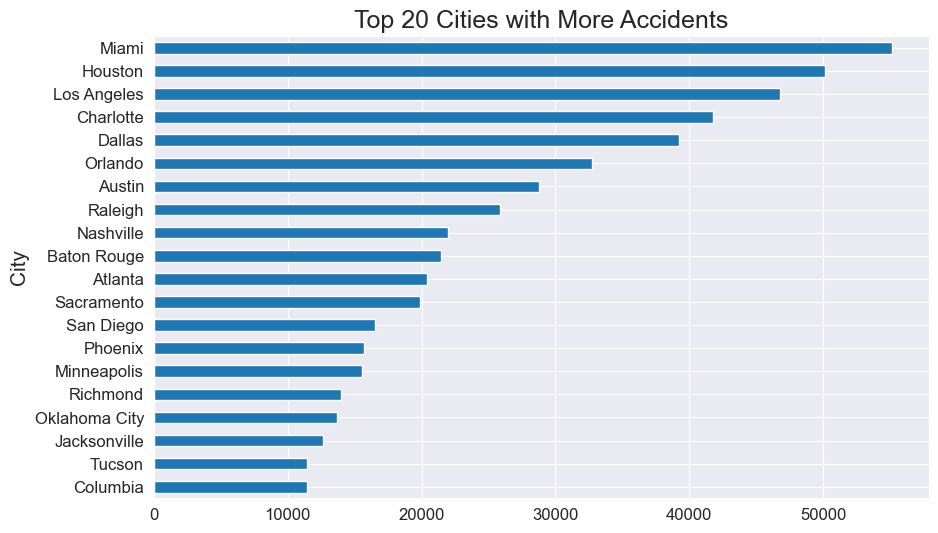

In [ ]:
cities_by_accident[:20].sort_values().plot(kind="barh")
plt.title("Top 20 Cities with More Accidents")
plt.show()

This bar chart displays the top 20 cities with the highest number of traffic accidents.
- **Miami, Houston, and Los Angeles** are the cities with the most recorded accidents, each exceeding **40,000** incidents.
- Other cities like **Charlotte, Dallas, and Orlando** also have a significant number of accidents.
- The ranking suggests that high-population urban centers and cities with complex road networks tend to have more accidents.

In [ ]:
"New York" in df.City

False

In [ ]:
"NY" in df.State

False

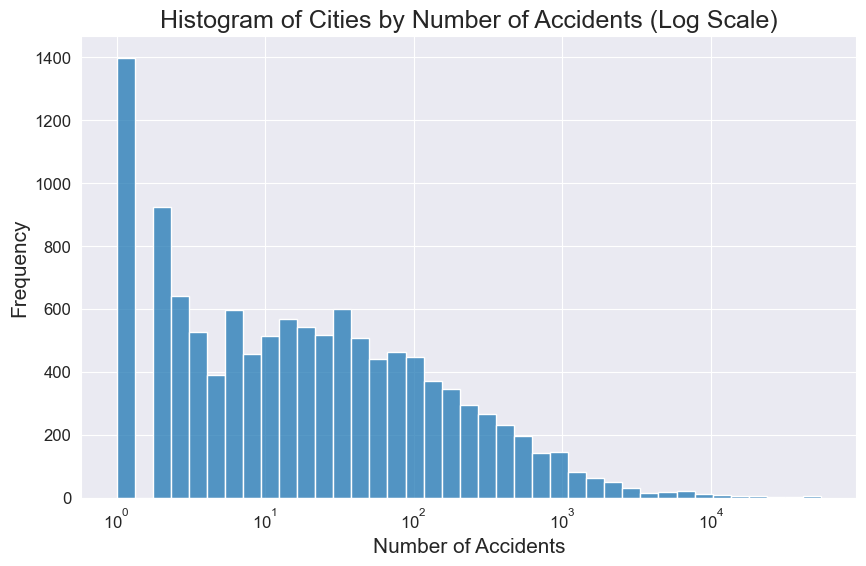

In [ ]:
sns.histplot(data=df.City.value_counts(), log_scale=True)
plt.xlabel("Number of Accidents")
plt.ylabel("Frequency")
plt.title("Histogram of Cities by Number of Accidents (Log Scale)")
plt.show()

This histogram shows the frequency of cities based on the number of accidents they experience.
- The x-axis is on a **logarithmic scale**, meaning the number of accidents ranges from a few cases to tens of thousands.
- The highest frequency is concentrated at the **lower end of the scale**, indicating that most cities have relatively few accidents.
- A **long tail** is observed, showing that a few cities experience an exceptionally high number of accidents.
- This distribution suggests that while most cities report only a small number of accidents, a **minority of cities contribute disproportionately** to the overall total.

**Key Takeaways**
1. **Urbanization and Traffic Volume**: Larger cities with higher traffic density tend to experience more accidents.
2. **Skewed Distribution**: A small number of cities contribute the majority of accidents, reinforcing the need for targeted safety interventions in high-risk areas.
3. **Logarithmic Scale Insight**: The vast difference in accident counts across cities suggests that risk factors (e.g., infrastructure, traffic laws, weather) vary significantly by location.

In [ ]:
len(cities_by_accident[cities_by_accident == 1])

1398

In [ ]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [ ]:
cities = df.City.unique()

In [ ]:
print(
    f"Percentage of accidents in cities with more than 1000 accidents: {len(high_accident_cities) / len(cities) * 100:.2f} %"
)

Percentage of accidents in cities with more than 1000 accidents: 3.01 %


In [ ]:
print(
    f"Percentage of accidents in cities with less than 1000 accidents: {len(low_accident_cities) / len(cities) * 100:.2f} %"
)

Percentage of accidents in cities with less than 1000 accidents: 96.98 %


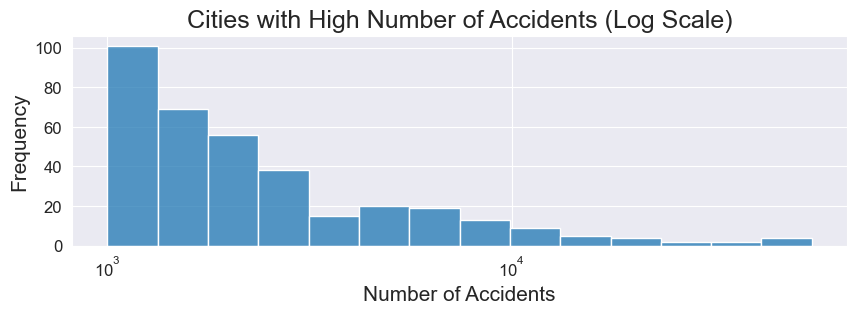

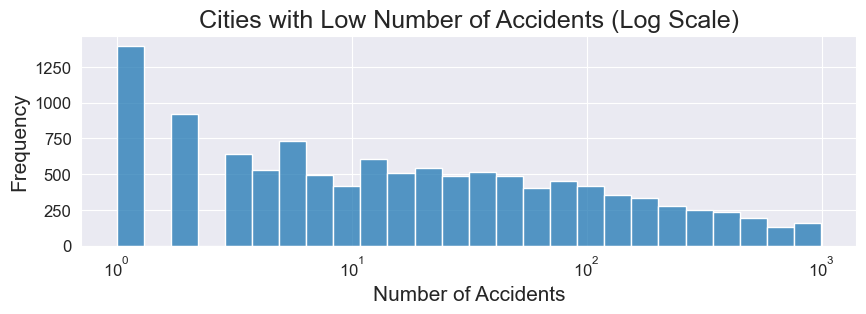

In [ ]:
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    plt.subplot(2, 1, 1)
    sns.histplot(high_accident_cities, log_scale=True)
    plt.xlabel("Number of Accidents")
    plt.ylabel("Frequency")
    plt.title("Cities with High Number of Accidents (Log Scale)")
    plt.show()

    plt.subplot(2, 1, 2)
    sns.histplot(low_accident_cities, log_scale=True)
    plt.xlabel("Number of Accidents")
    plt.ylabel("Frequency")
    plt.title("Cities with Low Number of Accidents (Log Scale)")
    plt.show()

**Top Histogram: Cities with High Number of Accidents (Log Scale)**
- This histogram focuses on cities with a **large number of accidents**.
- The x-axis is on a **logarithmic scale** to handle the wide range of accident numbers.
- Most cities fall within the range of **1,000 to 10,000 accidents**.
- A small number of cities exceed **10,000 accidents**, indicating a minority of cities are responsible for an exceptionally high number of accidents.
- The **frequency drops as the number of accidents increases**, showing that very few cities have extremely high accident numbers.


**Bottom Histogram: Cities with Low Number of Accidents (Log Scale)**
- This histogram focuses on cities with **smaller numbers of accidents**.
- A large portion of cities reported accidents in the range of **1 to 100**.
- There is a significant number of cities with fewer than **10 accidents**, indicating many cities experience very few accidents annually.
- As the number of accidents increases, the frequency gradually declines, but not as rapidly as in the high-accident histogram.
  

**Key Insights**
1. **Skewed Distribution**: The accident data is highly skewed. Most cities fall into the "low accidents" category, while a small number of cities account for a significant proportion of accidents.
  
2. **Urban Concentration**: Cities with high populations and traffic density are likely in the high-accident category. Rural or smaller cities dominate the low-accident range.

3. **Long Tail Phenomenon**: The high-accident cities show a long tail, indicating a few outliers with extremely high accident numbers.
---

### Which is the per capita accidents for the top 5 states with more accidents?

In [ ]:
df["State"].value_counts().head(5)

State
CA    508453
FL    260057
TX    172485
SC    112859
NY    103416
Name: count, dtype: int64

In [ ]:
# 2020 Census population data for each state
state_population = {
    "CA": 39538223,
    "FL": 21538187,
    "TX": 29145505,
    "SC": 5118425,
    "NY": 20201249,
}

In [ ]:
# Calculate accidents per capita
accidents_per_state_df = df["State"].value_counts().head(5).reset_index()
accidents_per_state_df.columns = ["State", "Accidents"]

In [ ]:
# Add population data to the dataframe
accidents_per_state_df["Population"] = accidents_per_state_df["State"].map(
    state_population
)

In [ ]:
# Calculate accidents per capita (per 100,000 people)
accidents_per_state_df["Accidents_Per_Capita"] = (
    accidents_per_state_df["Accidents"] / accidents_per_state_df["Population"]
) * 100000

In [ ]:
# Get the top 5 states by accidents per capita
top_5_accidents_per_capita = accidents_per_state_df.sort_values(
    by="Accidents_Per_Capita", ascending=False
)

In [ ]:
top_5_accidents_per_capita

,State,Accidents,Population,Accidents_Per_Capita
3,SC,112859,5118425,2204.955626
0,CA,508453,39538223,1285.978381
1,FL,260057,21538187,1207.422890
2,TX,172485,29145505,591.806524
4,NY,103416,20201249,511.928743


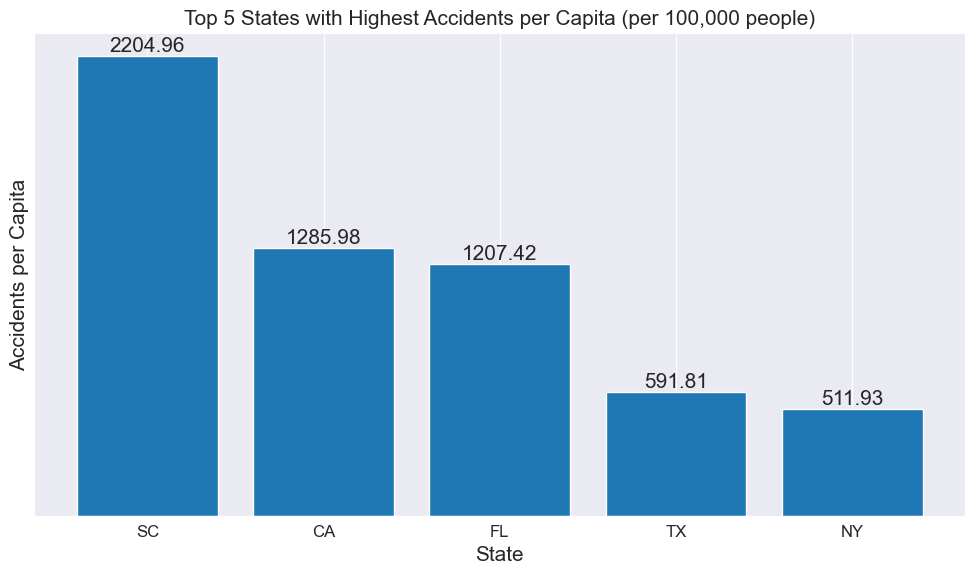

In [ ]:
states = top_5_accidents_per_capita["State"]
accidents_per_capita = top_5_accidents_per_capita["Accidents_Per_Capita"]


bars = plt.bar(states, accidents_per_capita)
plt.title(
    "Top 5 States with Highest Accidents per Capita (per 100,000 people)", fontsize=15
)
plt.xlabel("State", fontsize=15)
plt.ylabel("Accidents per Capita", fontsize=15)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
    )

# Remove y-axis line and ticks
ax = plt.gca()
ax.spines["left"].set_visible(False)
ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

**Top 5 States with Highest Accidents per Capita (2020 Census)**

**Observations**
- **South Carolina (SC)**: Leads with **2,204.96 accidents per 100,000 people**, significantly higher than the other states.
- **California (CA)** and **Florida (FL)** follow, with values around **1,285.98** and **1,207.42 per 100,000 people** respectively.
- **Texas (TX)** and **New York (NY)** report lower accident rates per capita, at **591.81** and **511.93 per 100,000 people**.

**Potential Effect of Population Density on Traffic Accidents**
1. **High-Density States (CA, NY)**  
   - California and New York have high population densities, which typically increase the risk of accidents due to more vehicles on the road and frequent congestion. However, the lower per capita rates suggest:
     - **Stricter regulations and enforcement**: Urban areas often have tighter traffic control and law enforcement measures.
     - **Public transportation**: New York, in particular, has a well-developed public transit system, reducing private vehicle usage.

2. **Low-Density States (SC, FL, TX)**  
   - South Carolina and Florida show higher accident rates despite lower population density. Possible reasons include:
     - **Higher reliance on private vehicles**: With limited public transport, residents drive more frequently.
     - **Rural roads**: Many rural roads are not as well-maintained or well-lit, increasing accident risk.
     - **Speeding and risky driving behavior**: Sparse traffic often leads to higher driving speeds, contributing to more accidents.
     - **Tourist traffic**: Florida experiences heavy tourism, leading to unfamiliar drivers on the road.

**Key Insights**
- **South Carolina’s alarming accident rate** suggests deeper issues such as road conditions, driver behavior, or lenient traffic enforcement.
- **California and New York** demonstrate that higher density does not necessarily lead to higher accidents per capita, highlighting the role of infrastructure, regulation, and alternative transit options.
- **Public safety interventions** (road safety campaigns, stricter traffic rules) may be especially beneficial in SC and FL.
---

### What is the Impact of Weather?

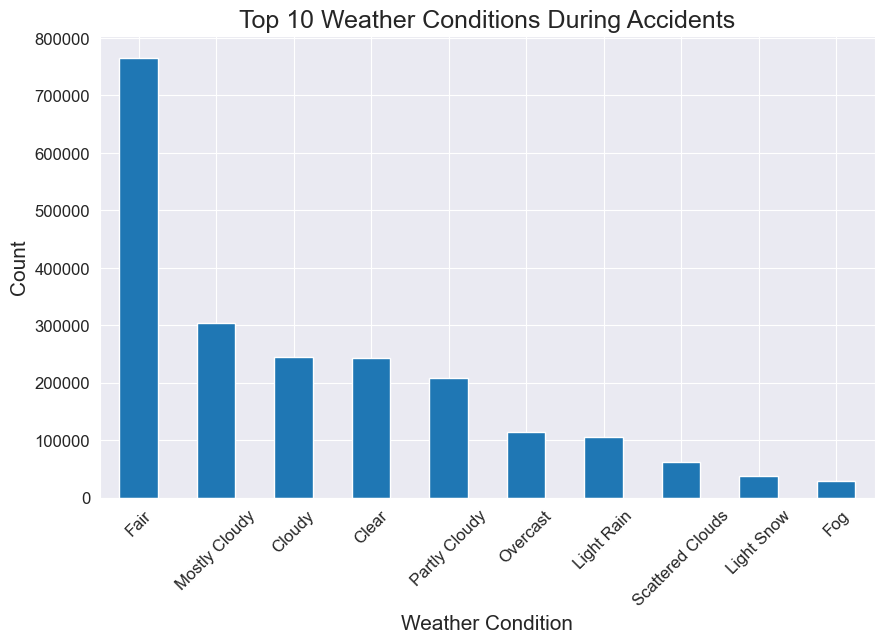

In [ ]:
df["Weather_Condition"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Top 10 Weather Conditions During Accidents**

**Observations**
- **Fair weather** conditions dominate as the leading condition during accidents, with a significantly higher count compared to other weather types.
- **Mostly Cloudy, Cloudy, and Clear** conditions have a relatively similar number of accidents, each contributing notably to the total accident count.
- **Light Rain and Overcast** weather conditions show a moderate frequency of accidents.
- **Fog and Light Snow** represent the smallest portions of accidents, indicating their infrequency in the dataset.

**Impact of Weather on Traffic Accidents**

1. **High Accidents in Fair Weather**  
   - Despite the common assumption that adverse weather leads to more accidents, fair weather conditions top the list.  
   - **Possible reasons**:  
     - **Overconfidence**: Drivers may be less cautious in clear conditions, leading to risky behavior (speeding, aggressive driving).  
     - **Higher traffic volume**: More vehicles may be on the road during favorable weather, increasing the probability of accidents.  
   
2. **Cloudy and Overcast Conditions**  
   - Cloudy or partly cloudy weather may reduce visibility slightly, contributing to higher accident rates than severe weather like fog or rain.  
   - Drivers may not adjust their driving behavior appropriately for reduced visibility.

3. **Light Rain and Snow**  
   - Although light rain and snow are less frequent, they are well-known for reducing tire traction, increasing braking distances, and causing hydroplaning or skidding.  
   - This suggests that even minor precipitation can pose significant risks.  

4. **Fog**  
   - Fog leads to very poor visibility, yet accidents in fog are less frequent in this dataset, likely due to its rarity or drivers taking extra precautions (e.g., reducing speed, turning on fog lights).

**Insights**
- Most accidents occur under **normal or mild weather conditions**, underscoring the need for driver education and public campaigns promoting caution even in ideal weather.
- Adverse weather conditions like rain and snow should still be monitored closely due to their potential to cause dangerous driving conditions.
- Safety measures, such as speed reduction and enhanced road lighting during cloudy and foggy weather, could mitigate accident risk.
Would you like further insights or comparisons on accident severity across weather conditions?
---

### Trends and Peak Times for Accidents

In [ ]:
df["Start_Time"].value_counts()

Start_Time
2021-01-26 16:16:13    65
2021-01-26 16:17:33    44
2021-02-16 06:42:43    35
2021-11-21 18:37:51    32
2021-04-26 08:58:47    27
                       ..
2019-01-29 18:16:32     1
2018-12-20 14:56:06     1
2018-12-18 05:47:38     1
2019-01-28 06:39:04     1
2019-08-28 22:10:00     1
Name: count, Length: 2060830, dtype: int64

In [ ]:
# Get a sample of the problematic data to understand the format
df["Start_Time"].sample(20)

1191834              2022-03-03 06:40:30
1283428              2022-06-15 09:39:00
592282               2019-07-22 16:09:36
2110987              2020-06-26 02:35:51
1075832              2016-04-11 07:21:44
993951               2017-08-04 09:06:57
2224488              2019-01-22 01:34:28
975957               2017-10-28 15:14:46
191531               2022-05-11 07:10:29
787757               2018-08-06 07:47:45
1664129              2021-08-11 05:32:30
2130901              2020-01-23 10:44:00
1048779              2016-11-10 14:51:48
1786676              2021-11-21 01:09:55
789419               2018-07-07 22:01:40
148177               2017-06-02 07:12:18
1523501    2023-01-27 16:39:38.000000000
67278                2017-01-10 16:35:26
1640573              2021-12-13 12:38:51
1931464              2021-01-06 20:44:23
Name: Start_Time, dtype: object

In [ ]:
# Remove extra characters ".000000000" if present
df["Start_Time"] = df["Start_Time"].str.replace(".000000000", "", regex=False)

In [ ]:
# Convert Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="mixed", errors="coerce")

In [ ]:
print(df["Start_Time"].dtype)

datetime64[ns]


In [ ]:
# Check for rows that couldn't be converted (if any)
invalid_times = df[df["Start_Time"].isnull()]
print(f"Number of invalid Start_Time entries: {len(invalid_times)}")

Number of invalid Start_Time entries: 0


In [ ]:
# # Drop rows with invalid datetime conversion
# df = df.dropna(subset=['Start_Time'])

In [ ]:
# Extract year, month, day, and hour
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour

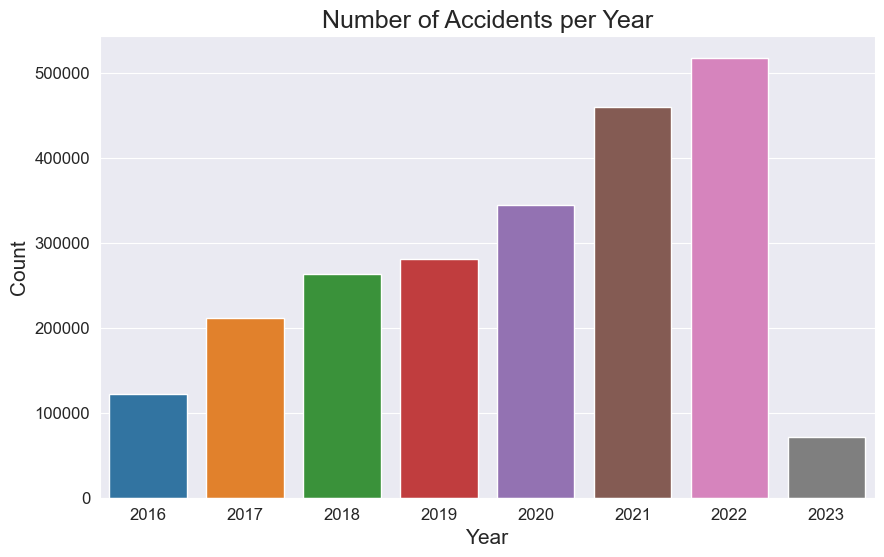

In [ ]:
sns.countplot(x="Year", data=df)
plt.title("Number of Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

1. **Overall Increasing Trend**  
   - The bar chart suggests that the total recorded accidents generally **increased from 2016 to 2022**.  
   - This rise could be influenced by:
     - **Population growth** and increased vehicle ownership.  
     - **Improved data collection** over time (e.g., more reporting sources, better coverage).  
     - **Urbanization** and congestion in many areas.

2. **Notable Drop in 2020**  
   - While not shown as a drastic drop, the 2020 bar may be slightly lower or relatively flat compared to the longer-term trend.  
   - This could align with **COVID-19 lockdowns**, reduced travel, and remote work, leading to fewer vehicles on the road during part of the year.

3. **Significant Jump in 2021 and 2022**  
   - Accidents appear to **rebound** and then **surge** in 2021 and 2022, potentially surpassing pre-pandemic levels.  
   - Factors might include:
     - **Return to normal traffic volumes** (commuting, travel) after lockdowns.  
     - **Pent-up travel demand** and **changes in driving behavior** after restrictions were lifted.

4. **Partial Data for 2016 and 2023**  
   - Data for **2016** starts from February, which explains why 2016’s bar is comparatively low.  
   - **2023** data only goes up to March, so it appears smaller. If extrapolated for the full year, it may follow the established trend.

5. **Data Collection Artifacts**  
   - It’s possible that improvements or changes in how accidents are **recorded or reported** contribute to the upward trend.  
   - Careful analysis is needed to differentiate genuine increases in accidents from better reporting or broader coverage.

**Key Takeaways**
- The data shows a **general increase** in accidents from 2016 to 2022, with **2020** being an anomaly likely due to the pandemic.
- **2023** data is incomplete and cannot be directly compared to full-year totals.
- **External factors**—like pandemic-related travel changes, evolving traffic laws, and population shifts—may all influence year-over-year accident counts.
- Further analysis could adjust for **reporting biases**, population growth, and other external factors to assess whether the rise is due to actual increases in accidents or better data coverage.

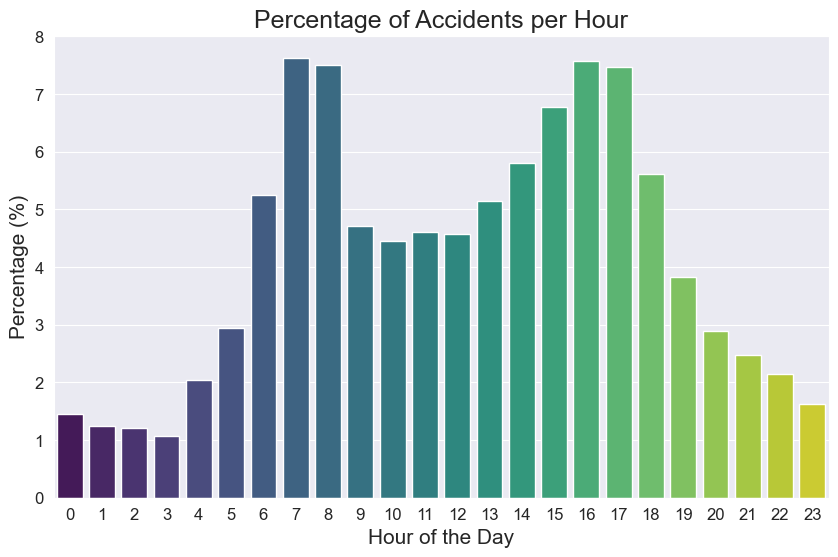

In [ ]:
hour_counts = df["Hour"].value_counts(normalize=True).sort_index() * 100
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")
plt.title("Percentage of Accidents per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage (%)")
plt.show()

This bar chart shows the **percentage of total accidents** occurring at each hour of the day (from **0** to **23**). Here are some key observations and insights:

1. **Morning Rush Hour Spike (6–9 AM)**  
   - Accidents start to climb around **6 AM**, peaking between **7 AM and 8 AM**.  
   - This aligns with the **morning commute**, when roads are busiest.

2. **Midday Moderation (10 AM–2 PM)**  
   - After the morning peak, the accident rate **drops** to a moderate level late in the morning and early afternoon.  
   - This period often has fewer commuters on the road compared to rush hours.

3. **Afternoon/Evening Rush Hour (3–6 PM)**  
   - Another noticeable rise occurs in the **mid-to-late afternoon**, peaking around **4–5 PM**.  
   - This reflects the **evening commute**, when people leave work or school.

4. **Evening and Nighttime Decline (7 PM–5 AM)**  
   - The percentage of accidents **declines** after **7 PM**, reaching the lowest levels between **1 AM and 5 AM**.  
   - Overnight hours generally have **less traffic**, leading to fewer accidents, though incidents at night can be more severe if they involve factors like fatigue or impaired driving.

**Key Takeaways**
- **Traffic Volume and Commuting Patterns**: The highest accident rates coincide with **rush hours**, underscoring the impact of congestion on road safety.  
- **Potential Interventions**:  
  - **Morning & Evening Commute**: Targeted traffic control measures, public transportation incentives, or staggered work hours could alleviate peak congestion.  
  - **Nighttime Driving**: While overall fewer accidents occur overnight, it remains a period with higher risk of **driver fatigue** or **impaired driving**; targeted enforcement and safety campaigns can help.


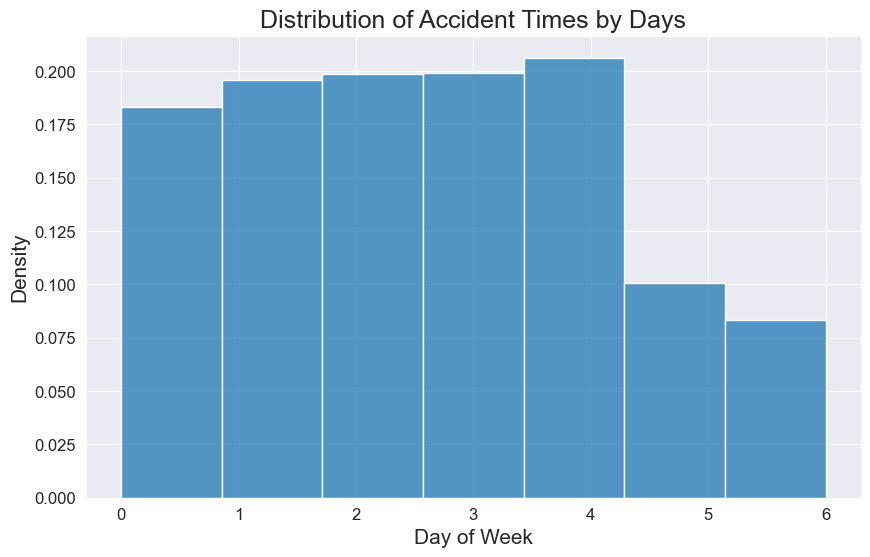

In [ ]:
sns.histplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, stat="density")
plt.xlabel("Day of Week")
plt.ylabel("Density")
plt.title("Distribution of Accident Times by Days")
plt.show()

**Distribution of Accident Times by Days**

- **Weekday vs. Weekend Patterns**:  
  - Weekdays (Monday–Friday) often see higher accident counts, largely due to **commuter traffic** (morning and evening rush hours).  
  - Some charts show Friday as particularly high, potentially reflecting end-of-week fatigue or increased travel before weekends.

- **Midweek Fluctuations**:  
  - Midweek days (Tuesday–Thursday) can show moderately high accident frequencies, again linked to consistent commuting.

- **Weekend (Saturday–Sunday)**:  
  - Often lower than weekdays overall, but accident timing can shift (e.g., later in the day, more nighttime activity).

---


**Let's check the week**

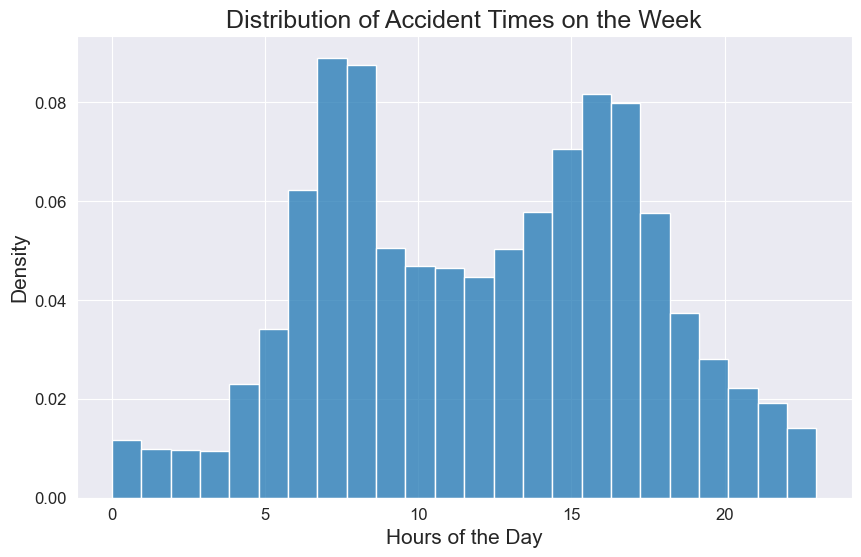

In [ ]:
week_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 & 1 & 2 & 3 & 4]
sns.histplot(week_start_time.dt.hour, bins=24, kde=False, stat="density")
plt.xlabel("Hours of the Day")
plt.ylabel("Density")
plt.title("Distribution of Accident Times on the Week")
plt.show()

**Distribution of Accident Times by Hours of the Day**

- **Rush Hour Peaks (Weekdays)**:  
  - **Morning Peak (6–9 AM)** and **Evening Peak (4–7 PM)** are clearly visible, correlating with **heavy commuter traffic**.  
  - The risk of accidents increases when many drivers are on the road simultaneously.

- **Midday and Overnight**:  
  - Late morning to early afternoon typically shows a dip in accident frequency.  
  - Overnight hours (1–5 AM) often have the **lowest accident counts**, though incidents during these times can be more severe if they involve fatigue or impaired driving.

---


**What about the Weekends?**

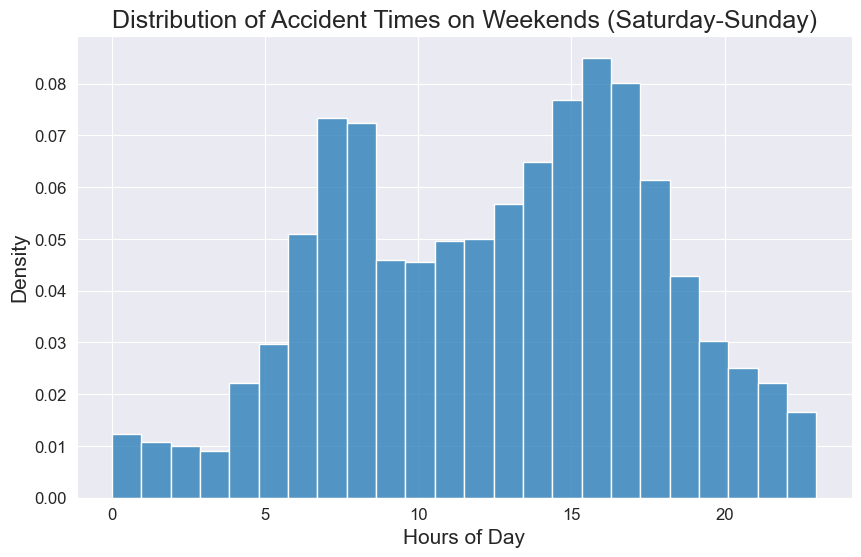

In [ ]:
weekend_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 5 & 6]
sns.histplot(weekend_start_time.dt.hour, bins=24, kde=False, stat="density")
plt.xlabel("Hours of Day")
plt.ylabel("Density")
plt.title("Distribution of Accident Times on Weekends (Saturday-Sunday)")
plt.show()

**Weekend-Specific Distribution**

- **Shifted Activity Patterns**:  
  - On weekends (Saturday–Sunday), accident peaks can move to **later in the morning or afternoon**, reflecting leisure travel, shopping, or social events.  
  - Evening or late-night spikes may occur due to nightlife activities and potential impaired driving.

- **Fewer Early-Morning Commutes**:  
  - Reduced morning commutes mean fewer accidents at **6–7 AM** compared to weekdays.

---


**Year with more acidents**

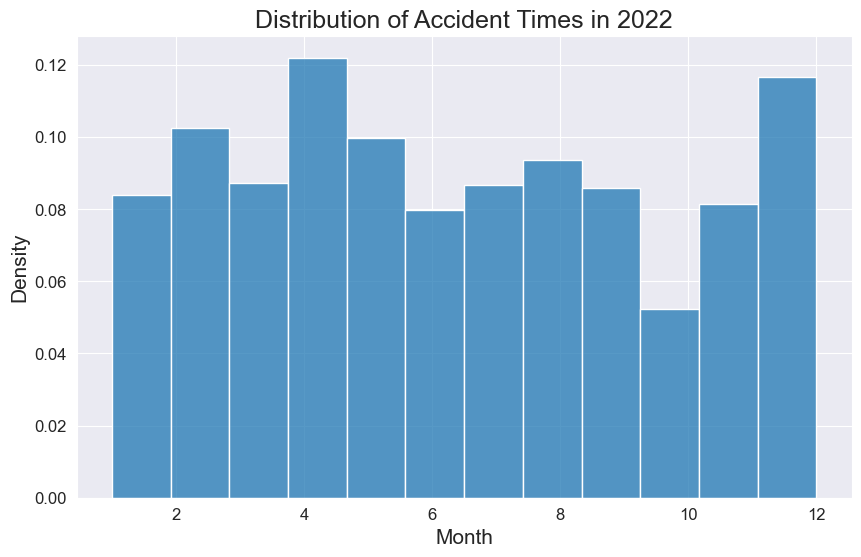

In [ ]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.histplot(df_2022.Start_Time.dt.month, bins=12, kde=False, stat="density")
plt.xlabel("Month")
plt.ylabel("Density")
plt.title("Distribution of Accident Times in 2022")
plt.show()

**Distribution of Accident Times in 2022 by Month**

- **Seasonal Variations**:  
  - Certain months show higher accident counts, which can be attributed to **holiday travel**, **summer vacation**, or **extreme weather** (depending on the region).  
  - Winter months (in colder regions) might see more severe but not necessarily more frequent accidents if drivers stay off the roads during extreme storms.

- **Potential Data Factors**:  
  - Differences could stem from **data collection coverage** or **reporting improvements** over time.  
  - **Population shifts** and **travel patterns** (e.g., more summer road trips, holiday driving) also influence monthly accident counts.

---

**Overall Insights**

1. **Commuter Traffic Dominates Weekdays**:  
   - Rush-hour congestion is a major factor in weekday accidents.

2. **Weekend Patterns Differ**:  
   - Accidents often peak later in the day, influenced by recreational or social travel.

3. **Seasonal and Monthly Factors**:  
   - Weather, holidays, and school/work schedules all shape monthly accident trends.

4. **Targeted Interventions**:  
   - **Weekday Rush Hours**: Potential for staggered work hours, ramp metering, or enhanced public transit options.  
   - **Weekend Evenings**: Enforcement of impaired driving laws, public safety campaigns.

5. **Data Quality Considerations**:  
   - The observed trends may partially reflect **improvements in reporting** or **changes in data sources** over the years.

By integrating these findings, transportation authorities and policy-makers can **prioritize safety measures** during high-risk hours, days, and seasons—potentially reducing both the frequency and severity of traffic accidents.

In [ ]:
import folium

lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(33.853855, -117.955376)

In [ ]:
for index, row in df[["Start_Lat", "Start_Lng"]].sample(100).iterrows():
    print(row["Start_Lat"], row["Start_Lng"])

27.243523 -80.860023
44.26042914369458 -117.1818816656247
33.960148 -118.244179
42.367298 -83.138481
34.124305 -118.632792
40.644118 -74.66770799999998
39.94553 -82.94272
43.783901 -88.481628
36.754488 -119.171276
37.507381 -120.956596
38.445869 -121.858505
30.394144 -97.746681
41.070854 -73.622824
42.968856 -73.81998
39.015234 -77.122782
33.152729 -80.05986
39.914078 -104.977844
33.766199 -117.932981
45.51724 -122.66482
34.08807 -118.23595
45.142143 -93.281654
30.443483 -97.833115
35.165401 -80.87769300000002
38.96208 -77.08029
37.255848 -121.955949
32.92494600000001 -96.998802
33.503059 -111.923332
29.923978 -90.008071
33.778836 -117.883897
30.380911 -91.096909
35.51859 -82.96736
38.801743 -77.112
39.592317 -75.678498
34.149466 -118.469084
40.718346 -73.408897
39.75421 -84.22416
40.6888 -73.80870999999998
28.333019 -81.48801800000003
34.521978000000004 -118.097385
34.26063895209188 -77.92788147889172
27.699369 -80.896622
40.096283 -75.168015
33.752135 -117.455359
29.029275 -82.15881


In [ ]:
from folium.plugins import HeatMap

sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

# Next Questions

1. Are there more accidents in warmer or colder areas?
2. Among the top 100 cities in number of accidents, which states do they belong to most frequently.
3. What time of the day are accidents most frequent in?
4. When is accidents per unit of traffic the highest.